In [1]:
#coding:utf-8
import wave
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(19950612)
np.random.seed(19950612)


In [2]:
def wave_load(filename):
    # open wave file
    wf = wave.open(filename,'r')
    channels = wf.getnchannels()

    # load wave data
    chunk_size = wf.getnframes()
    amp  = (2**8) ** wf.getsampwidth() / 2
    data = wf.readframes(chunk_size)   # バイナリ読み込み
    data = np.frombuffer(data,'int16') # intに変換
    data = data / amp                  # 振幅正規化
    data = data[::channels]
    

    return data

In [3]:
def fft_load(count,instrument,size,start,end):
    '''
    count = グラフに入れたい数
    instrument = 楽器のディレクトリ
    size = FFTのサンプル数（２＊＊ｎ）
    start　=乱数の開始位置
    end = 乱数の終点位置

    '''
    st = 10000   # サンプリングする開始位置
    hammingWindow = np.hamming(size)    # ハミング窓
    fs = 44100 #サンプリングレート
    d = 1.0 / fs #サンプリングレートの逆数
    freqList = np.fft.fftfreq(size, d)
    
    for i in range(count):
        n = random.randint(start,end)
        filename = "./" + instrument + "/output/" + str(n) +".wav"
        wave = wave_load(filename)
        windowedData = hammingWindow * wave[st:st+size]  # 切り出した波形データ（窓関数あり）
        data = np.fft.fft(windowedData)
        data = data / max(abs(data)) # 0~1正規化
        plt.plot(freqList,abs(data))
#         plt.plot(range(start, start+size), windowedData)
         
    plt.axis([0,fs/16,0,max(abs(data))]) #第二引数でグラフのy軸方向の範囲指定
    plt.title("Normalizationed")
    plt.xlabel("Frequency[Hz]")
    plt.ylabel("amplitude spectrum")
    plt.show()
    
#     plt.plot(range(start, start+size), windowedData)
#     plt.axis([start, start+size, -1.0, 1.0])
#     plt.xlabel("time [sample]")
#     plt.ylabel("amplitude")
#     plt.show()

    return data

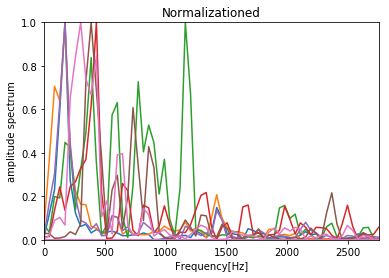

array([ 0.00433794+0.j        ,  0.01556901-0.01275156j,
       -0.03258507+0.08304381j, ...,  0.06854795+0.07695768j,
       -0.03258507-0.08304381j,  0.01556901+0.01275156j])

In [4]:
fft_load(7,"Aguitar",1024,0,700)